# YZV 211E 
# Homework 1 
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In the world of AI, the ability to access and manipulate data from various sources is a fundamental skill. This assignment is designed to give you hands-on experience in working with Application Programming Interfaces (APIs), which allow different software systems to interact and share information. You will be tasked with obtaining data from two public APIs, applying data transformation techniques to filter and process the received information, and finally, visualizing the results.
<p align="center">
  <img src="https://rapidapi.com/blog/wp-content/uploads/2023/03/What-is-an-API-definition.webp" width="600" height="400" alt="convert notebook to web app">
</p>

**Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.**

In [1]:
# You can use the following libraries if you need them.
import requests
from datetime import datetime, timedelta

import time
import pandas as pd
import matplotlib.pyplot as plt

### What is Kraken API ?

The Kraken Public REST API is a part of the Kraken cryptocurrency exchange's API suite that provides access to publicly available market data and information without requiring user authentication. Here's a brief summary of the key features of the Kraken Public REST API:

1. **Market Data**: The API allows users to access a wide range of market data, including order book snapshots, recent trade history, and historical OHLCV (Open/High/Low/Close/Volume) data for various cryptocurrency trading pairs.

2. **Asset Information**: Users can retrieve information about available cryptocurrency assets, their trading pairs, and other details related to the exchange's offerings.

3. **Ticker Information**: The API provides real-time and historical price ticker information for trading pairs on Kraken.

4. **Time Information**: Developers can access the current time on the Kraken server, which is useful for synchronizing their applications with the exchange.

5. **Supported Pairs**: Kraken supports a wide range of cryptocurrency pairs and trading instruments, and the Public REST API enables users to query the available pairs and their details.

6. **Rate Limiting**: Kraken imposes rate limits on API requests to prevent abuse and ensure fair usage of their resources. These rate limits are important to keep in mind when using the API.


### Part 1: Get BTC Data from REST API 25p

In this part, you will use [Get OHCL Data Public Endpoint](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData). The goal is receiving hourly BTC price and volume data. Define the pair as 'XXBTZUSD'.
* Show the data.

   
The Documentation shows:
* Query Parameter
* Response Schema
* Request Sample
* Response Sample

In [2]:
import requests

# Define the Kraken API endpoint
api_url = "https://api.kraken.com/0/public/OHLC"

# Defining the trading pair 
trading_pair = "XXBTZUSD"  

# Defining any additional parameters you want to include in the request
params = {
    "pair": trading_pair,
    "interval": 60,
    
}

# Make the GET request
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # The response content is in JSON format
    data = response.json()
    # Printing the data:
    print("Data:\n", data)
else:
    print("Error:", response.status_code)

Data:
 {'error': [], 'result': {'XXBTZUSD': [[1705503600, '42553.2', '42720.4', '42458.0', '42471.6', '42570.2', '59.94223718', 936], [1705507200, '42465.2', '42500.1', '42246.4', '42318.0', '42384.3', '342.91650886', 1548], [1705510800, '42318.0', '42416.6', '42190.2', '42350.0', '42324.0', '92.20114677', 1037], [1705514400, '42350.1', '42579.5', '42268.9', '42575.5', '42370.5', '169.62416569', 1062], [1705518000, '42575.5', '42699.8', '42546.5', '42585.5', '42603.8', '36.24069511', 748], [1705521600, '42585.5', '42811.6', '42557.8', '42690.3', '42684.5', '151.64591044', 1144], [1705525200, '42690.2', '42785.2', '42592.8', '42641.1', '42681.3', '33.88856554', 725], [1705528800, '42642.8', '42693.7', '42439.4', '42654.6', '42559.5', '65.56402293', 812], [1705532400, '42654.6', '42747.9', '42599.1', '42747.8', '42693.0', '24.32013729', 570], [1705536000, '42746.1', '42751.2', '42609.9', '42638.0', '42651.4', '30.71176400', 548], [1705539600, '42638.0', '42666.8', '42495.5', '42556.3', '

### Part 2: BTC Data to Pandas Dataframe & Filtering 25p

You should complete some tasks using [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) . After receiving the BTC data using API, it is expected to filter the dataset by date. The dataset should include price values only between times 'October 10, 2023 00\:00\:00' and 'October 17, 2023 20\:00\:00'.

After that, we need to find the hours with the highest price increase and the hours with the highest price decrease. Price change can be calculated as the difference between the closing and opening prices for the given time.

* For example if open=10 and close=20 for one hour, it means the price increasing. The price change is calculated as 20-10=10.
* If open=10 and close=5 for one hour, it means the price descreasing. The price change is calculated as 5-10=-5.


* Show the hours you found.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData) for meaningful column names.


In [3]:
import pandas as pd
import datetime

# Assuming you have already obtained the data from the Kraken API and stored it in 'data'
# Extract the relevant data for the trading pair 'XXBTZUSD'
 
btc_data = data['result'][trading_pair]

# Define meaningful column names
column_names = ["Time", "Open", "High", "Low", "Close", "Vwap", "Volume", "Count"]

# Creating a DataFrame 
df = pd.DataFrame(btc_data, columns=column_names)

# Converting the 'Time' column to a human-readable format
df['Time'] = pd.to_datetime(df['Time'], unit='s')

print(df)




                   Time     Open     High      Low    Close     Vwap  \
0   2023-09-30 18:00:00  27031.0  27031.0  27020.1  27020.2  27025.6   
1   2023-09-30 19:00:00  27020.2  27038.4  27014.7  27030.9  27021.4   
2   2023-09-30 20:00:00  27031.0  27081.1  27031.0  27075.8  27068.9   
3   2023-09-30 21:00:00  27075.8  27089.9  26969.0  27007.0  27033.7   
4   2023-09-30 22:00:00  27007.0  27041.2  27006.7  27011.0  27019.7   
..                  ...      ...      ...      ...      ...      ...   
715 2023-10-30 13:00:00  34619.1  34783.7  34506.9  34682.4  34722.2   
716 2023-10-30 14:00:00  34682.4  34841.2  34590.0  34615.5  34717.2   
717 2023-10-30 15:00:00  34615.5  34760.0  34615.5  34659.0  34712.8   
718 2023-10-30 16:00:00  34659.0  34667.7  34352.3  34466.3  34508.3   
719 2023-10-30 17:00:00  34466.4  34477.8  34355.6  34355.6  34438.3   

           Volume  Count  
0     12.01458002    687  
1     11.43952800    593  
2     26.48910935    695  
3     35.49689412    849  


In [4]:
# Define the date range for filtering
start_date = datetime.datetime(2023, 10, 10, 0, 0, 0)
end_date = datetime.datetime(2023, 10, 17, 20, 0, 0)

# Filter the DataFrame by date range
filtered_df = df[(df['Time'] >= start_date)&(df['Time'] <= end_date)]

# Reset index numbers
filtered_df.reset_index(drop=True, inplace=True)
print(filtered_df)

                   Time     Open     High      Low    Close     Vwap  \
0   2023-10-10 00:00:00  27586.1  27633.4  27557.8  27561.3  27615.3   
1   2023-10-10 01:00:00  27558.0  27606.4  27519.8  27600.1  27561.4   
2   2023-10-10 02:00:00  27600.1  27699.8  27579.3  27691.8  27666.5   
3   2023-10-10 03:00:00  27691.9  27691.9  27633.1  27633.2  27660.0   
4   2023-10-10 04:00:00  27633.2  27633.2  27601.2  27606.7  27625.1   
..                  ...      ...      ...      ...      ...      ...   
184 2023-10-17 16:00:00  28480.3  28600.0  28457.5  28600.0  28561.4   
185 2023-10-17 17:00:00  28600.0  28606.3  28383.7  28440.3  28514.5   
186 2023-10-17 18:00:00  28440.4  28490.6  28319.9  28370.6  28422.0   
187 2023-10-17 19:00:00  28370.7  28511.9  28369.9  28511.9  28470.5   
188 2023-10-17 20:00:00  28511.9  28545.1  28470.1  28470.2  28524.4   

           Volume  Count  
0     19.53456160    840  
1     93.64274434    702  
2     36.12849695    660  
3     14.99362608    626  


In [5]:
import pandas as pd

filtered_df_copy = filtered_df.copy()  # Create a copy of the DataFrame

# Calculate Price Changes
filtered_df_copy['Open'] = filtered_df_copy['Open'].astype(float)
filtered_df_copy['Close'] = filtered_df_copy['Close'].astype(float)
filtered_df_copy['Price Change'] = filtered_df_copy['Close'] - filtered_df_copy['Open']

# Display the table
print("Filtered Data:" , '\n')
print(filtered_df_copy)



Filtered Data: 

                   Time     Open     High      Low    Close     Vwap  \
0   2023-10-10 00:00:00  27586.1  27633.4  27557.8  27561.3  27615.3   
1   2023-10-10 01:00:00  27558.0  27606.4  27519.8  27600.1  27561.4   
2   2023-10-10 02:00:00  27600.1  27699.8  27579.3  27691.8  27666.5   
3   2023-10-10 03:00:00  27691.9  27691.9  27633.1  27633.2  27660.0   
4   2023-10-10 04:00:00  27633.2  27633.2  27601.2  27606.7  27625.1   
..                  ...      ...      ...      ...      ...      ...   
184 2023-10-17 16:00:00  28480.3  28600.0  28457.5  28600.0  28561.4   
185 2023-10-17 17:00:00  28600.0  28606.3  28383.7  28440.3  28514.5   
186 2023-10-17 18:00:00  28440.4  28490.6  28319.9  28370.6  28422.0   
187 2023-10-17 19:00:00  28370.7  28511.9  28369.9  28511.9  28470.5   
188 2023-10-17 20:00:00  28511.9  28545.1  28470.1  28470.2  28524.4   

           Volume  Count  Price Change  
0     19.53456160    840         -24.8  
1     93.64274434    702          42

In [6]:
# Find the hour with the highest price increase
date_with_highest_increase_index = filtered_df_copy['Price Change'].idxmax()
value = filtered_df_copy.iloc[date_with_highest_increase_index]

print(value, '\n','*********************************')

# Find the Time value using index
date_with_highest_increase = filtered_df_copy.loc[date_with_highest_increase_index, 'Time']  # GMT +0000


# Find the hour with the highest price decrease
date_with_highest_decrease_index = filtered_df_copy['Price Change'].idxmin()
value = filtered_df_copy.iloc[date_with_highest_decrease_index]
print(value)
# Find the Time value using index
date_with_highest_decrease = filtered_df_copy.loc[date_with_highest_decrease_index, 'Time']  # GMT +0000



Time            2023-10-16 05:00:00
Open                        27262.0
High                        27970.0
Low                         27261.9
Close                       27913.1
Vwap                        27641.7
Volume                 560.49845700
Count                          3821
Price Change                  651.1
Name: 149, dtype: object 
 *********************************
Time            2023-10-11 02:00:00
Open                        27435.9
High                        27437.5
Low                         27061.0
Close                       27120.9
Vwap                        27215.1
Volume                 181.26133886
Count                          1718
Price Change                 -315.0
Name: 26, dtype: object


In [7]:
# Display the results
print("Date with Highest Price Increase:", date_with_highest_increase)
print("Date with Highest Price Decrease:", date_with_highest_decrease)

Date with Highest Price Increase: 2023-10-16 05:00:00
Date with Highest Price Decrease: 2023-10-11 02:00:00


### Part 3: Get Trade Data from REST API 25p

Now, we have two timestamp values of the highest price changes. We want to analyze these hours in more detail by looking their trades. You will use the public endpoint called [Get Recent Trade](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades). You should find all the trades within the selected hours, that you have already found in Part 2.
* For example if selected_ts=1697500800 (dt = '2023-10-17 00\:00\:00'), you should include all the trades between '2023-10-17 00\:00\:00'  and '2023-10-17 01\:00\:00'.
* Show the trade data.

**Note:** The first few trades after 1 hour can be ignored, because it depends on the 'count' parameter you choose.

In [8]:
import requests
import pandas as pd
from datetime import datetime

# Define your Kraken API endpoint and parameters
base_url = "https://api.kraken.com/0/public/Trades"
pair = "XXBTZUSD"

# Convert date (GMT +0000) to unix timestamp again
unix_timestamp = (date_with_highest_increase - datetime(1970, 1, 1)).total_seconds()

# Define the time range // There is a timezone differance hope it is not a problem.
start_time = datetime.utcfromtimestamp(unix_timestamp)
end_time = start_time + pd.DateOffset(hours=1)

# Initialize an empty DataFrame to store the results
filtered_df1 = pd.DataFrame()

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
# IDK Why this notebook only shows limited results but with this given code snippet you can show the whole table data
#pd.set_option("display.max_rows", None)
#pd.reset_option("display.max_rows")
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# Split the 1-hour interval into smaller time intervals
interval_minutes = 10
current_time = start_time

# We are sending multiple requests to get all data in the desired interval
while current_time < end_time:
    # Convert the current time to a Unix timestamp
    unix_timestamp = (current_time - datetime(1970, 1, 1)).total_seconds()
    
    # Set up the parameters
    params = {
        "pair": pair,
        "since": unix_timestamp,
        "count": 1000,
    }
    
    # Make the API request
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        trade_data = data["result"][pair]
    
        # Create a DataFrame from the trade data
        column_names = ["Price", "Volume", "Time", "Buy/Sell", "Market/Limit", "Miscellaneous", "Trade_id"]
        df = pd.DataFrame(trade_data, columns=column_names)
        
        # Convert the 'Time' column to a datetime object without considering the timezone
        df['Time'] = pd.to_datetime(df['Time'], unit='s')

        filtered_df1 = pd.concat([filtered_df1, df])
    else:
        print(f"API request failed with status code: {response.status_code}")
    # Move to the next time interval
    current_time += timedelta(minutes=interval_minutes)


# Filter the DataFrame to include only trades within the specified time range
filtered_df1 = filtered_df1[filtered_df1['Time'] <= end_time]
print(filtered_df1)



           Price      Volume                          Time Buy/Sell  \
0    27262.00000  0.00036139 2023-10-16 05:00:00.054248448        b   
1    27262.00000  0.00033862 2023-10-16 05:00:32.720192768        b   
2    27262.00000  0.00375000 2023-10-16 05:01:04.801383168        b   
3    27262.00000  0.01600000 2023-10-16 05:01:09.031017216        b   
4    27262.00000  2.01000000 2023-10-16 05:01:18.845548800        b   
..           ...         ...                           ...      ...   
266  27913.90000  0.00144654 2023-10-16 05:59:50.842191104        b   
267  27918.20000  0.01820491 2023-10-16 05:59:50.842224640        b   
268  27914.00000  0.00861781 2023-10-16 05:59:56.855735808        b   
269  27918.40000  0.00870000 2023-10-16 05:59:57.981472256        b   
270  27913.10000  0.17905102 2023-10-16 05:59:58.736723712        b   

    Market/Limit Miscellaneous  Trade_id  
0              l                63366956  
1              l                63366957  
2              m  

In [9]:
import requests
import pandas as pd
from datetime import datetime

# Define your Kraken API endpoint and parameters
base_url = "https://api.kraken.com/0/public/Trades"
pair = "XXBTZUSD"

# Convert date to unix timestamp again
unix_timestamp = (date_with_highest_decrease - datetime(1970, 1, 1)).total_seconds()

# Define the time range // There is a timezone differance hope it is not a problem.
start_time = datetime.utcfromtimestamp(unix_timestamp)
end_time = start_time + pd.DateOffset(hours=1)

# Initialize an empty DataFrame to store the results
filtered_df2 = pd.DataFrame()

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
# IDK Why this notebook only shows limited results but with this given code snippet you can show the whole table data
#pd.set_option("display.max_rows", None)
#pd.reset_option("display.max_rows")
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# Split the 1-hour interval into smaller time intervals
interval_minutes = 10
current_time = start_time

# We are sending multiple requests to get all data in the desired interval
while current_time < end_time:
    # Convert the current time to a Unix timestamp
    unix_timestamp = (current_time - datetime(1970, 1, 1)).total_seconds()
    
    # Set up the parameters
    params = {
        "pair": pair,
        "since": unix_timestamp,
        "count": 1000,
    }
    
    # Make the API request
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        trade_data = data["result"][pair]
    
        # Create a DataFrame from the trade data
        column_names = ["Price", "Volume", "Time", "Buy/Sell", "Market/Limit", "Miscellaneous", "Trade_id"]
        df = pd.DataFrame(trade_data, columns=column_names)
        
        # Convert the 'Time' column to a datetime object without considering the timezone
        df['Time'] = pd.to_datetime(df['Time'], unit='s')

        filtered_df2 = pd.concat([filtered_df2, df])
    else:
        print(f"API request failed with status code: {response.status_code}")
    # Move to the next time interval
    current_time += timedelta(minutes=interval_minutes)

# Filter the DataFrame to include only trades within the specified time range
filtered_df2 = filtered_df2[filtered_df2['Time'] <= end_time]
print(filtered_df2)

           Price      Volume                          Time Buy/Sell  \
0    27435.90000  0.00021869 2023-10-11 02:00:00.432487936        b   
1    27435.90000  0.00026238 2023-10-11 02:00:15.065344512        b   
2    27435.90000  0.00329117 2023-10-11 02:00:30.472915456        b   
3    27435.90000  0.00179550 2023-10-11 02:00:39.031270144        b   
4    27435.90000  0.00371592 2023-10-11 02:00:40.087316736        b   
..           ...         ...                           ...      ...   
153  27119.20000  0.00404510 2023-10-11 02:59:33.980654336        b   
154  27123.60000  0.00677627 2023-10-11 02:59:33.980688128        b   
155  27123.60000  0.00941224 2023-10-11 02:59:33.980722432        b   
156  27120.90000  0.03006391 2023-10-11 02:59:51.459870208        b   
157  27120.90000  0.00500000 2023-10-11 02:59:54.860668672        b   

    Market/Limit Miscellaneous  Trade_id  
0              m                63264627  
1              l                63264628  
2              m  

### Part 4: Trade Data to Pandas Dataframe & Analysis 25p

In the last part, it is expected to visualize your result. We want to see how the average volume of hours, with the highest price increase and highest price decrease, differ in buying and selling transactions. You should use bar plot where 'x' axis should represent the unique values of 'buy/sell' column and 'y' axis should represent the mean of volume.

In the end, you should obtain two different bar plots. One for the highest increase and one for the the highest decrease.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades) for meaningful column names.


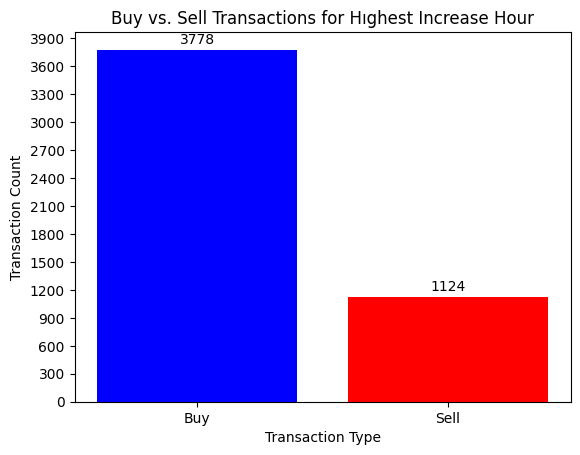

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame containing "Buy" transactions
buy_df = filtered_df1[filtered_df1['Buy/Sell'] == 'b'].copy()  
# .copy() is essential for not to get 'SettingWithCopyWarning' error in next part

# DataFrame containing "Sell" transactions
sell_df = filtered_df1[filtered_df1['Buy/Sell'] == 's'].copy()

# Number of "Buy" transactions
buy_count = len(buy_df)

# Number of "Sell" transactions
sell_count = len(sell_df)

# Preparing for the bar plot
transaction_types = ['Buy', 'Sell']
transaction_counts = [buy_count, sell_count]

# Creating a bar plot
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.title('Buy vs. Sell Transactions for Hıghest Increase Hour')
colors = ['blue', 'red']  # Blue for 'Buy' and red for 'Sell'
plt.bar(transaction_types, transaction_counts, color=colors)

# Customize the Y-axis ticks with a 300-unit increment 
plt.yticks(range(0, max(transaction_counts) + 300, 300))

# Show values on top of the bars
for i in range(len(transaction_types)):
    plt.text(i, transaction_counts[i] + 30, str(transaction_counts[i]), ha='center', va='bottom')

plt.show()


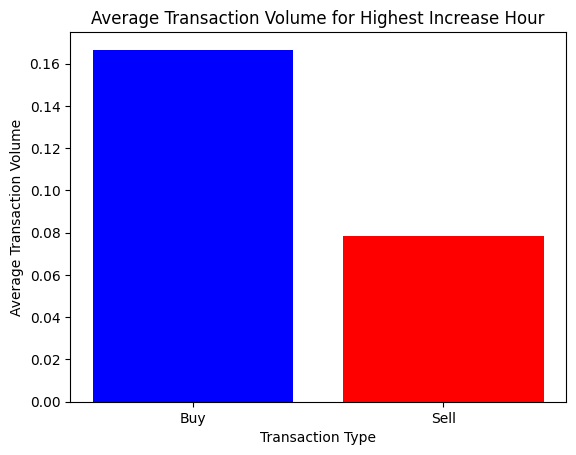

In [17]:
# Convert the 'Volume' column to a numeric data type because it is string as far as I can understand
buy_df['Volume'] = pd.to_numeric(buy_df['Volume'])
sell_df['Volume'] = pd.to_numeric(sell_df['Volume'])

# Total volume of Buy transactions
total_buy_volume = buy_df['Volume'].sum()

# Total volume of Sell transactions
total_sell_volume = sell_df['Volume'].sum()

# Calculate the average volume for Buy transactions
average_buy_volume = total_buy_volume / buy_count

# Calculate the average volume for Sell transactions
average_sell_volume = total_sell_volume / sell_count

# Preparing for the bar plot
transaction_types = ['Buy', 'Sell']
average_volumes = [average_buy_volume, average_sell_volume]

# Creating a bar plot
plt.bar(transaction_types, average_volumes, color=['blue', 'red'])
plt.xlabel('Transaction Type')
plt.ylabel('Average Transaction Volume')
plt.title('Average Transaction Volume for Highest Increase Hour')
plt.show()

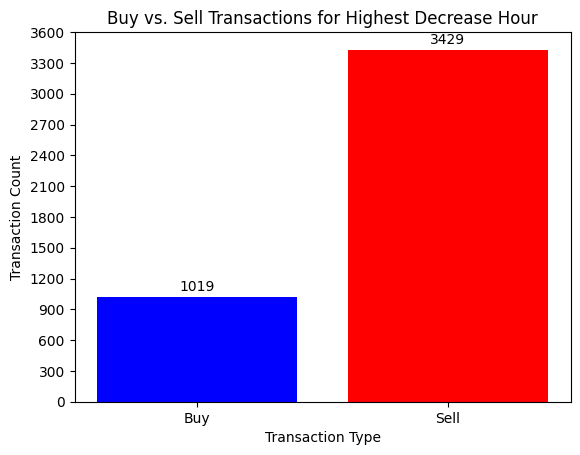

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame containing "Buy" transactions
buy_df = filtered_df2[filtered_df2['Buy/Sell'] == 'b'].copy()  

# DataFrame containing "Sell" transactions
sell_df = filtered_df2[filtered_df2['Buy/Sell'] == 's'].copy()  

# Number of "Buy" transactions
buy_count = len(buy_df)

# Number of "Sell" transactions
sell_count = len(sell_df)

# Preparing for a bar plot
transaction_types = ['Buy', 'Sell']
transaction_counts = [buy_count, sell_count]

# Creating a bar plot
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.title('Buy vs. Sell Transactions for Highest Decrease Hour')
colors = ['blue', 'red']  # Blue for 'Buy' and red for 'Sell'
plt.bar(transaction_types, transaction_counts, color=colors)

# Customize the Y-axis ticks with a 300-unit increment 
plt.yticks(range(0, max(transaction_counts) + 300, 300))

# Show values on top of the bars
for i in range(len(transaction_types)):
    plt.text(i, transaction_counts[i] + 30, str(transaction_counts[i]), ha='center', va='bottom')


plt.show()







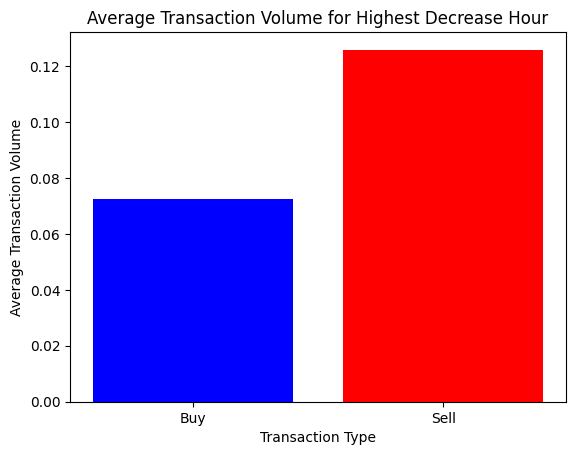

In [19]:
# Convert the 'Volume' column to a numeric data type because it is string as far as I can understand
buy_df['Volume'] = pd.to_numeric(buy_df['Volume'])
sell_df['Volume'] = pd.to_numeric(sell_df['Volume'])

# Total volume of Buy transactions
total_buy_volume = buy_df['Volume'].sum()

# Total volume of Sell transactions
total_sell_volume = sell_df['Volume'].sum()

# Calculate the average volume for Buy transactions
average_buy_volume = total_buy_volume / buy_count

# Calculate the average volume for Sell transactions
average_sell_volume = total_sell_volume / sell_count

# Preparing for the bar plot
transaction_types = ['Buy', 'Sell']
average_volumes = [average_buy_volume, average_sell_volume]

# Creating a bar plot
plt.bar(transaction_types, average_volumes, color=['blue', 'red'])
plt.xlabel('Transaction Type')
plt.ylabel('Average Transaction Volume')
plt.title('Average Transaction Volume for Highest Decrease Hour')
plt.show()